In [1]:
import pandas as pd
import numpy as np

import scipy

from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline
import seaborn as sns

from scipy import stats

In [2]:
data = pd.read_csv('table_tink.csv')
data.head()

,ic,session_id,source,device_type,medium,user_type,variation,loads,submit_short,submit
0,8622ec3f-ff3e-11e9-8000-000051787d40,AV3Ag4n6iKs,google,HIGHEND_PHONE,ctx.cpc,Visitor,1134:4075-Новая продуктовая,1,0,0
1,3c6cdd0b-0315-11ea-8000-0000e93dddd1,AV3G9VJrLAA,google,HIGHEND_PHONE,ctx.cpc,Visitor,1134:4075-Новая продуктовая,1,0,0
2,fc573c77-0c23-11ea-8000-00002250d9e6,AV3WJ3UuV38,yandex.ru,HIGHEND_PHONE,NaN,Visitor,1134:4074-Контрольная вариация,1,0,0
3,c67e3adf-0482-11ea-8000-00000e0d01e7,AV3JWqsYa6o,http://yandex.ru/searchapp?text=,HIGHEND_PHONE,NaN,Client-Heavy,1134:4074-Контрольная вариация,1,0,0
4,9f6fadb9-fbff-11e9-8000-00004777e08e,AV27D4ECjyY,yandex,PERSONAL_COMPUTER,ctx.cpc,Visitor,1134:4074-Контрольная вариация,1,0,0


посчитаем общее кол-во идентификаторов вариации

In [3]:
data['variation'].value_counts()

1134:4075-Новая продуктовая       509
1134:4074-Контрольная вариация    491
Name: variation, dtype: int64

кол-во уникальных сессий 

In [4]:
data['session_id'].nunique()

995

oпределим сессии, в которые совершалось больше 1 события

In [5]:
data['session_id'].value_counts()[data['session_id'].value_counts() > 1].index

Index(['AV3S9Hka3VY', 'AV3ApaafjQQ', 'AV3UFEsjGzk', 'AV3EXHEUcvo',
       'AV3UEUlhaK8'],
      dtype='object')

In [6]:
data[data['session_id']=='AV3S9Hka3VY']

,ic,session_id,source,device_type,medium,user_type,variation,loads,submit_short,submit
113,d021cd55-0a3b-11ea-8000-0000e6ce10ab,AV3S9Hka3VY,yandex.ru,HIGHEND_PHONE,NaN,Visitor,1134:4075-Новая продуктовая,1,0,0
567,1bca4db0-0a3c-11ea-8000-00009e18b085,AV3S9Hka3VY,yandex.ru,HIGHEND_PHONE,NaN,Visitor,1134:4075-Новая продуктовая,1,0,0


In [7]:
data[data['session_id']=='AV3UEUlhaK8']

,ic,session_id,source,device_type,medium,user_type,variation,loads,submit_short,submit
415,9c602e40-0ae5-11ea-8000-0000d218e5fc,AV3UEUlhaK8,https://www.tinkoff.ru/cards/credit-cards/,HIGHEND_PHONE,NaN,Visitor,1134:4074-Контрольная вариация,0,1,0
900,8e36e1bf-0ae8-11ea-8000-000063b1efc4,AV3UEUlhaK8,https://www.tinkoff.ru/cards/credit-cards/,HIGHEND_PHONE,NaN,Visitor,1134:4074-Контрольная вариация,0,0,1


In [8]:
data[data['session_id']=='AV3ApaafjQQ']

,ic,session_id,source,device_type,medium,user_type,variation,loads,submit_short,submit
215,8e84f481-ff5d-11e9-8000-0000c65d3ea0,AV3ApaafjQQ,cross_mvno,HIGHEND_PHONE,NaN,Visitor,1134:4074-Контрольная вариация,0,1,0
799,70aa2bea-ff54-11e9-8000-0000cc24536f,AV3ApaafjQQ,avito_cc,HIGHEND_PHONE,aft.THANKYOUPAGE,Visitor,1134:4074-Контрольная вариация,0,1,0


In [9]:
data[data['session_id']=='AV3UFEsjGzk']

,ic,session_id,source,device_type,medium,user_type,variation,loads,submit_short,submit
64,5895e2fa-0ae7-11ea-8000-000080f22983,AV3UFEsjGzk,www.google.com,HIGHEND_PHONE,NaN,Visitor,1134:4075-Новая продуктовая,0,1,0
110,5895e2fa-0ae7-11ea-8000-000080f22983,AV3UFEsjGzk,www.google.com,HIGHEND_PHONE,NaN,Visitor,1134:4075-Новая продуктовая,1,0,0


In [10]:
data[data['session_id']=='AV3EXHEUcvo']

,ic,session_id,source,device_type,medium,user_type,variation,loads,submit_short,submit
503,f5065f2e-0188-11ea-8000-0000d996616b,AV3EXHEUcvo,https://www.tinkoff.ru/cards/credit-cards/,PERSONAL_COMPUTER,NaN,Visitor,1134:4075-Новая продуктовая,1,0,0
704,e7496ed5-0188-11ea-8000-0000b864baf7,AV3EXHEUcvo,https://www.tinkoff.ru/cards/credit-cards/,PERSONAL_COMPUTER,NaN,Visitor,1134:4075-Новая продуктовая,1,0,0


Cдедублицирование

если сессии повторяются, для лучшей конверисии за агрегирование возьмем позицию, которая в воронке стоит ниже

(loads->submit_short->submit)

In [11]:
del_index = [567, 415, 799, 110, 704 ]

In [12]:
data = data[~data.index.isin(del_index)]
data['variation'].value_counts()

1134:4075-Новая продуктовая       506
1134:4074-Контрольная вариация    489
Name: variation, dtype: int64

кол-во каналов, с которых пришел пользователь

In [13]:
data['medium'].nunique()

29

каналы, с которых пришло больше всего пользователей

In [14]:
data['medium'].value_counts()[:10]

ctx.cpc             360
aft.APPR             41
mln.unp              18
trg.cpc              17
aft.ACT               9
smm.unp               7
aft.THANKYOUPAGE      7
mln                   6
trg.cpm               6
aft.UTIL              6
Name: medium, dtype: int64

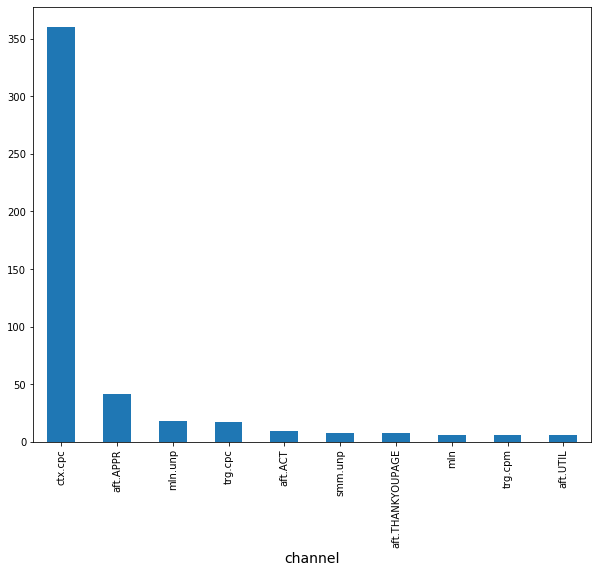

In [15]:
plt.figure(figsize=(10,8))
data['medium'].value_counts()[:10].plot(kind='bar')
plt.xlabel('channel',fontsize=14);

источники трафика (по нагрузке)

In [16]:
data.groupby('source')['loads'].sum().sort_values(ascending=False)[:15]

source
google                                        205
yandex                                        111
yandex.ru                                      77
www.google.com                                 59
https://www.tinkoff.ru/cards/credit-cards/     32
https://www.google.ru/                         29
www.google.ru                                  27
www.yandex.ru                                  21
https://www.tinkoff.ru/                        15
https://yandex.ru/                             14
https://www.google.com/                        12
mytarget_cc                                    11
link.emails.tinkoff.ru                         11
admitad_cc                                     11
emailsma                                       10
Name: loads, dtype: int64

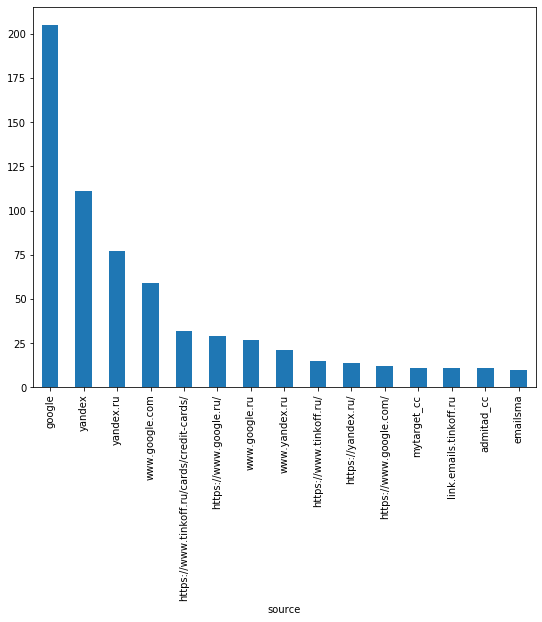

In [17]:
plt.figure(figsize=(9,7))
data.groupby('source')['loads'].sum().sort_values(ascending=False)[:15].plot(kind='bar');

для наглядности разобьем исходную таблицу по идентификатору вариации

In [18]:
data_new = data[data['variation'] =='1134:4075-Новая продуктовая']
data_control = data[data['variation'] == '1134:4074-Контрольная вариация']

посмотрим, с каких каналов привлечения приходят пользователи 2 групп

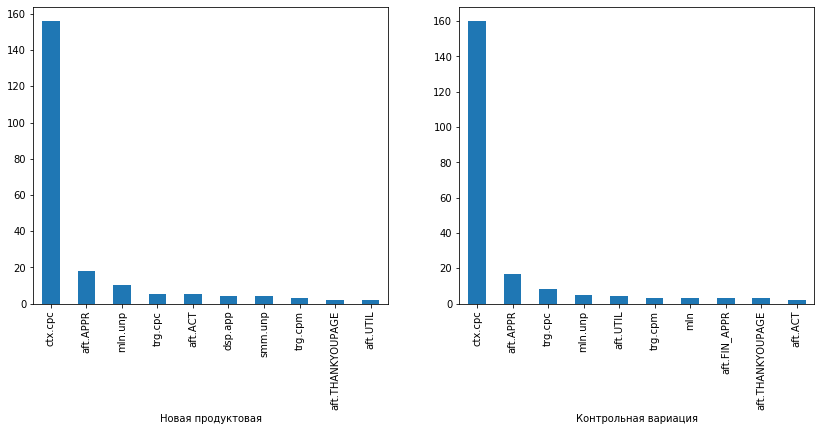

In [19]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
data_new.groupby('medium')['loads'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Новая продуктовая')

plt.subplot(2,2,2)
data_control.groupby('medium')['loads'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Контрольная вариация');

Чаще всего пользователи приходят с ctx.cpc и aft.APPR. В группу "Новая продуктовая" канал mln.unp привлек больше пользователей, чем trg.cpc, в "Контрольная вариация" - наоборот 

Откуда приходил трафик

"Новая продуктовая"

In [20]:
data_new.groupby('source')['loads'].sum().sort_values(ascending=False)[:5]

source
google                                        106
yandex                                         50
yandex.ru                                      40
www.google.com                                 37
https://www.tinkoff.ru/cards/credit-cards/     15
Name: loads, dtype: int64

"Контрольная вариация"

In [21]:
data_control.groupby('source')['loads'].sum().sort_values(ascending=False)[:5]

source
google            99
yandex            61
yandex.ru         37
www.google.com    22
www.google.ru     17
Name: loads, dtype: int64

In [22]:
data.shape

(995, 10)

посмотрим на распределение событий на разных девайсах для 2 групп

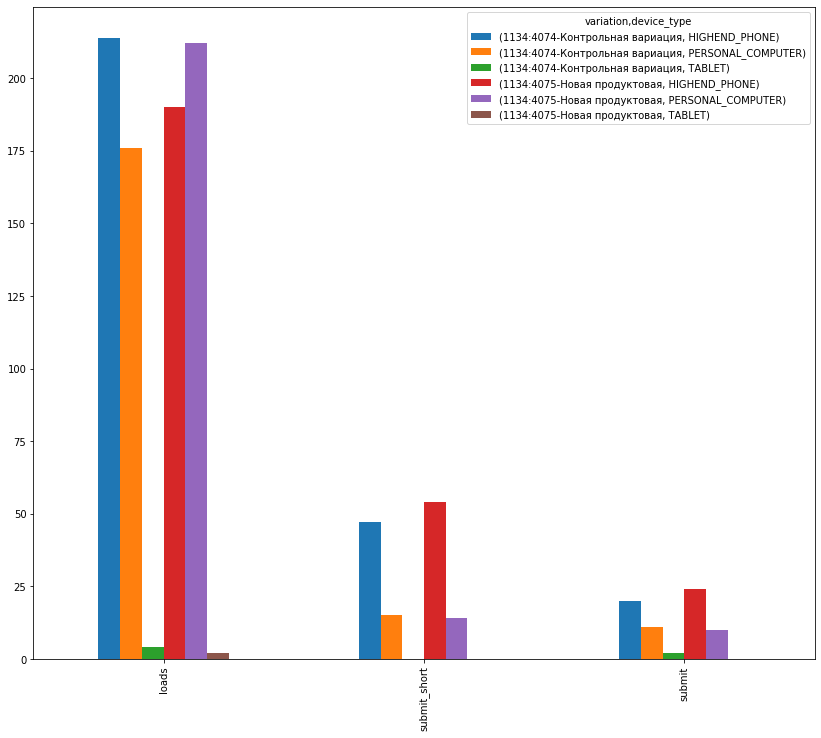

In [23]:
data.groupby(['variation', 'device_type']) \
        ['loads', 'submit_short', 'submit'].sum().transpose().plot(kind='bar', figsize=(14,12));

по графику видно, что событие-загрузка страницы для control-группы совершалось больше с телефонов, в то время как у new было больше загрузок с компьютера
    неполный сабмит у control-группы также больше был с телефонов, как и у new-группы, однако в обоих случаях неполные сабмиты отсутствуют с планшетов.
Некоторое кол-во сабмитов у control-группы было осуществлено чз планшет, у new-группы нет

метрика1: 
насколько в группе new больше пользовательских загрузок по сравнению с группой control в процентах от числа загрузок в контрольной группе, в процентах

In [24]:
round((data_new['loads'].sum() - data_control['loads'].sum())/data_control['loads'].sum()*100,3)

2.538

метрика2: 
насколько в группе new больше пользовательских submit_short по сравнению с группой control в процентах от числа submit_short в контрольной группе, в процентах

In [25]:
round((data_new['submit_short'].sum() - data_control['submit_short'].sum())/data_control['submit_short'].sum()*100,3)

9.677

метрика3: насколько в группе new больше пользовательских полных submit по сравнению с группой control в процентах от числа полных submit в контрольной группе, в процентах

In [26]:
round((data_new['submit'].sum() - data_control['submit'].sum())/data_control['submit'].sum()*100, 2)

3.03

Pаспределение событий по идентификаторам вариации 



In [27]:
df =pd.DataFrame(index=['1134:4074-Контрольная вариация', '1134:4075-Новая продуктовая'])
df = data.groupby('variation')['loads', 'submit_short', 'submit'].sum()
df['n'] = [data_control.shape[0], data_new.shape[0]]
df= df.reindex(columns=['n','loads', 'submit_short', 'submit'])
df

,n,loads,submit_short,submit
variation,,,,
1134:4074-Контрольная вариация,489,394,62,33
1134:4075-Новая продуктовая,506,404,68,34


***Визуализация продуктовой воронки***

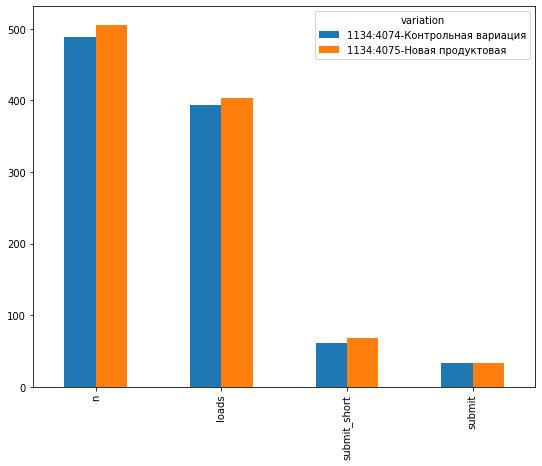

In [28]:
df.transpose().plot(kind='bar', figsize=(9,7));

посмотрим конверсию

In [29]:
df['submit']/df['n']*100

variation
1134:4074-Контрольная вариация    6.748466
1134:4075-Новая продуктовая       6.719368
dtype: float64

если брать к общему числу испытуемым, видно, что качество даже купало

In [30]:
df['submit']/df['loads']*100

variation
1134:4074-Контрольная вариация    8.375635
1134:4075-Новая продуктовая       8.415842
dtype: float64

если смотреть относительно загрузки страницы, качество увеличилось, можно сказать не значительно(0.04%)

Проверим статисическую значимость данного AB-теста

* Н0: A-тест=B-тест
* Н1: против двусторонней А!=В

достигаемый уровень значимости посчитаем с помощью scipy.stats.chi2_contingency

In [31]:
stats.chi2_contingency(df)

(0.12674647075190007,
 0.9884450267635194,
 3,
 array([[489.        , 392.18291457,  63.88944724,  32.92763819],
        [506.        , 405.81708543,  66.11055276,  34.07236181]]))

In [32]:
p_value = stats.chi2_contingency(df)[1]
p_value

0.9884450267635194

сравнивая p_value c порогом альфа в 0.05 (или даже 0.1), мы не можем отвергнуть нулевую гипотезу, следовательно в данном аб-тесте стат.значимости не наблюдается

Возможные решения проблемы:

1)сделать перcонализацию

In [33]:
pers_new = data_new.groupby('user_type')['loads', 'submit_short', 'submit'].sum()
pers_new

,loads,submit_short,submit
user_type,,,
Applicant,4,2,1
Applicant: Credit Cards;Tinkoff Platinum,0,0,1
Applicant: Loans;Mortgage,1,0,0
Client-Heavy,54,2,2
Client-Light,21,4,2
Visitor,281,55,25


In [34]:
pers_cont = data_control.groupby('user_type')['loads', 'submit_short', 'submit'].sum()
pers_cont

,loads,submit_short,submit
user_type,,,
Applicant,4,0,1
Client-Heavy,63,2,2
Client-Light,13,2,4
Visitor,264,53,25


по user_type видно, что они группы не однородны, например user_type-"Applicant"

2) проверить данный аб-тест на большей по кол-ву выборке, однако "-"-затратнее и не факт, что покажет рез-т